In [23]:
last = 0 
now = 0
nums=[2,1,1,2]
for i in nums: 
    #其实就是一个奇数和偶数位元素求和，哪个更大么？
    last, now = now, max(last + i, now)
now

4

In [27]:
def rob( nums):
        """
        :type nums: List[int]
        :rtype: int
        """
        result = 0

        if not nums:
            return result
            
        for i in range(len(nums)):
            result = max(result, nums[i] + rob(nums[i+2:]))

        return result
nums=[2,1,1,2]
rob(nums=nums)

4

In [7]:
n=123
for  i  in str(n):
    i=int(i)
    print(i)
    print(type(i))

1
<class 'int'>
2
<class 'int'>
3
<class 'int'>


In [10]:
def isHappy( n):
        """
        :type n: int
        :rtype: bool
        """
        a=set()
        
        while n!=1:
            tem=0
            for i in str(n):
                tem+=int(i)**2
            
            print(n)
            if n in a:
                return False
            else:
                a.add(n)
            n=tem
        return True
    
isHappy(19)

19
82
68
100


True

In [8]:
def countPrimes(n):
        """
        :type n: int
        :rtype: int
        """
        if n==0 or n==1:
            return 0
        flag=0
        count=0
        for i in range(2,n):  # 循环检查每个小于n的数
            # 检查是否为质数
            
            for j in range(2,i):
                if i%j == 0:
                    flag=1
                    break
            if flag==0:
                count+=1
                print(i)
            else:
                flag=0
        return count
countPrimes(10)

2
3
5
7


4

In [22]:
def isIsomorphic(s, t):
        """
        :type s: str
        :type t: str
        :rtype: bool
        """
        l1=aabb(s)
        l2=aabb(t)
        
        for i in range(len(l1)):
            if l1[i] != l2[i]:
                return False
        return True
        
def aabb(s):
    a={}
    b=1
    c=[]
    for i in s:
        if i in a:
            c.append(a[i])
        else:
            a[i]=b
            c.append(b)
            b+=1
    return c

isIsomorphic('abba','abab')

False

In [1]:
a=[1,2,3]
for i in a[::-1]:
    print(i)

3
2
1


In [3]:
n=5
type(bin(n))



str

# 232、用栈实现队列

In [ ]:
class MyQueue(object):

    def __init__(self):
        """
        Initialize your data structure here.
        """
        self.stack1=[]   # 用作存储数据
        self.stack2=[]   # pop操作中用作中转
        
    def push(self, x):
        """
        Push element x to the back of queue.
        :type x: int
        :rtype: None
        """
        self.stack1.append(x)

    def pop(self):
        """
        Removes the element from in front of queue and returns that element.
        :rtype: int
        """
        while self.stack1:
            self.stack2.append(self.stack1.pop()) # stack1中所有元素转移到了stack2中，并且顺序相反
        res=self.stack2.pop() 
        while self.stack2:
            self.stack1.append(self.stack2.pop())  # stack2 中元素转移回stack1
        return res

    def peek(self):
        """
        Get the front element.
        :rtype: int
        """
        if len(self.stack1)>0:
            return self.stack1[0]
        else:
            return None

    def empty(self):
        """
        Returns whether the queue is empty.
        :rtype: bool
        """
        return len(self.stack1) == 0


# Your MyQueue object will be instantiated and called as such:
# obj = MyQueue()
# obj.push(x)
# param_2 = obj.pop()
# param_3 = obj.peek()
# param_4 = obj.empty()

# 234、回文链表

In [ ]:
# Definition for singly-linked list.
# class ListNode(object):
#     def __init__(self, x):
#         self.val = x
#         self.next = None

class Solution(object):
    def isPalindrome(self, head):
        """
        :type head: ListNode
        :rtype: bool
        """
        # 提取所有值
        val_list=[]
        while head:
            val_list.append(head.val)
            head=head.next
        # 检验是否是回文
        length=len(val_list)
        for i in range(length//2):
            if val_list[i] != val_list[length-i-1]:
                return False
        return True

# 235、二叉搜索树的公共祖先

**思路：
二叉搜索树又叫做二叉排序树，二叉查找树。利用二叉搜索树性质：左子树都小于根节点内，右子树都大于根节点，如果在之间则已经找到了**

In [ ]:
# Definition for a binary tree node.
# class TreeNode(object):
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class Solution(object):
    def lowestCommonAncestor(self, root, p, q):
        """
        :type root: TreeNode
        :type p: TreeNode
        :type q: TreeNode
        :rtype: TreeNode
        """
        if p.val < root.val >q.val:
            return self.lowestCommonAncestor(root.left,p,q)
        if p.val > root.val < q.val:
            return self.lowestCommonAncestor(root.right,p,q)
        return root
        

# 237、删除链表中的点

**思路：本题没有给head节点，只用node做。把node.next的值赋给node，然后node.next指向node.next.next**

In [ ]:
# Definition for singly-linked list.
# class ListNode(object):
#     def __init__(self, x):
#         self.val = x
#         self.next = None

class Solution(object):
    def deleteNode(self, node):
        """
        :type node: ListNode
        :rtype: void Do not return anything, modify node in-place instead.
        """
        node.val = node.next.val
        node.next=node.next.next

# 242、有效的字母异位词

In [ ]:
class Solution(object):
    def isAnagram(self, s, t):
        """
        :type s: str
        :type t: str
        :rtype: bool
        """
        alpha_count={}
        for i in s:  # 统计s中字母出现的次数
            if i not in alpha_count:
                alpha_count[i]=1
            else:
                alpha_count[i]+=1
        for j in t:  # t中如果出现相同字母则减一
            if j not in alpha_count:
                return False
            else:
                alpha_count[j]-=1
        for v in alpha_count.values(): # 查看是否所有值都为0
            if v != 0:
                return False
        return True

In [2]:
s='abc'
for i in s:
    print(i)

a
b
c


# 257、二叉树的所有路径

从根节点出发找叶子，找到叶子之后，所有这条“找寻之路”上的所有节点构成了我们要打印出来的一条路径。所以，我们需要建立一个全局变量path，存储未到达当前节点时扫描过的路径中有哪些节点，作为从当前节点起，往叶子遍历所经过的路径的前缀。同理，最后的结果列表也是一个全局变量了。 
所以，当题目中给出的函数形参只有一个root时，我们就需要再设定一个辅助函数，包含刚才说的path和result，让他们两个成为全局变量。 
总结一下思路： 
1. 建立一个字符串变量path和结果列表result，初始化为空 
2. 从根节点开始访问，之后访问其左子树，再访问其右子树 
3. 每访问一个节点，将节点的值加入path，例如，访问完根节点后，path = “1 ->”，并将这里的path作为新的变量加入左右子树的遍历函数 
4. 递归“触底”的条件：访问的节点为空 
思路： 
二叉树遍历问题 
如果当前节点的左儿子和右儿子都为None => 说明当前节点为一个根节点，输出一条路径 

In [ ]:
# Definition for a binary tree node.
# class TreeNode(object):
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None


class Solution(object):
    def binaryTreePaths(self, root):
        """
        :type root: TreeNode
        :rtype: List[str]
        """
        def get_path(root,path,res):  # 记录经过的节点
            if not root.left and not root.right:  # 到达叶子节点，一条路径形成
                res.append(path+str(root.val))
                return
            if root.left:
                get_path(root.left,path+str(root.val)+'->',res)
            if root.right:
                get_path(root.right,path+str(root.val)+'->',res)
            
        if not root:
            return []
        res=[]
        get_path(root,'',res)
        return res

# 258、各位相加

数字转换为字符串格式，进行遍历相加

In [ ]:
class Solution(object):
    def addDigits(self, num):
        """
        :type num: int
        :rtype: int
        """
        while num//10 > 0:
            tem=0
            for i in str(num):
                tem += int(i)
                num=tem
        return num

# 263、丑数

    把num中的2 3 5 通过while循环清除干净 ， 如果还含有其他质因数则最后结果不为1

In [4]:
def isUgly(num):
    """
    :type num: int
    :rtype: bool
    """
    if num == 0:
        return False
    div=[2,3,5]
    for i in div:
        while num % i == 0:  # num中包含2,3,5 ， 利用while循环把num中的2,3,5除干净
            num/=i
    return num == 1
isUgly(6)
isUgly(8)
isUgly(14)

False

# 268、缺失数字

set求两集合之差

In [ ]:
class Solution(object):
    def missingNumber(self, nums):
        """
        :type nums: List[int]
        :rtype: int
        """
        n=len(nums)
        whole=set([x for x in range(n+1)])
        return (whole-set(nums)).pop()

# 278、第一个错误的版本

暴力查找内存占用太高，不能满足题目要求，改用二分查找法，循环停止条件是start > end

In [ ]:
# The isBadVersion API is already defined for you.
# @param version, an integer
# @return a bool
# def isBadVersion(version):
# 内存占用太高 ， 此法弃用
class Solution(object):
    def firstBadVersion(self, n):
        """
        :type n: int
        :rtype: int
        """
        
        for i in range(n,0,-1):
            if not isBadVersion(i):
                return i+1
        if not isBadVersion(1):
            return 1

In [ ]:
# The isBadVersion API is already defined for you.
# @param version, an integer
# @return a bool
# def isBadVersion(version):

class Solution(object):
    def firstBadVersion(self, n):
        """
        :type n: int
        :rtype: int
        """
        start = 1
        end = n
        mid=(start + end)//2
        
        while start <= end:
            if isBadVersion(mid):
                end=mid-1
            else:
                start=mid+1
            mid=(start+end)//2
        return start

# 283、移动零

遍历nums，发现非零元素就用当前的非零元素从头开始覆盖nums，遍历完毕，补零

In [4]:
class Solution(object):   # 运行速度不快
    def moveZeroes(self, nums):
        """
        :type nums: List[int]
        :rtype: None Do not return anything, modify nums in-place instead.
        """
        count_0=nums.count(0)  # 记录0的个数
        for i in range(count_0):
            nums.remove(0)
        tem=[0]*n   # 需要连接的0 
        nums.extend(tem)

[1, 3]

In [5]:
class Solution(object):
    def moveZeroes(self,nums):
        if nums is None:
            return None
        j = 0
        #j :记录找到的non-zero数量
        for num in nums:
            if num!=0:
                nums[j]=num
                j=j+1
        if j is 0:
            return nums
        for i in range(j,len(nums)):
            nums[i]=0
        return nums

[1, 3]

# 290、单词规律

构建字典，k为pattern中的单个元素，v是s_list = str.split(' ')中的单个元素。如果当前键不存在则输入字典，如果当前键已经存在，则检查当前s_list中元素是否等于字典中已存在键的值。   
"abba"   "dog dog dog dog"  为了排除这种情况还要首先进行验证两个两个字符串set去重后长度是否相等

In [ ]:
# 正确

class Solution(object):
    def wordPattern(self, pattern, str):
        """
        :type pattern: str
        :type str: str
        :rtype: bool
        """
        s_list=str.split(' ')
        dic={}
        if len(s_list) != len(pattern) or len(set(pattern)) != len(set(s_list)):
            return False
        for i in range(len(pattern)):
            if pattern[i] not in dic:
                dic[pattern[i]] = s_list[i]
            else:
                if s_list[i] != dic[pattern[i]]:
                    return False
        return True

In [ ]:
# 这种解法错误
class Solution(object):
    def wordPattern(self, pattern, str):
        """
        :type pattern: str
        :type str: str
        :rtype: bool
        """
        def make_dict(s_list):
            s_dict={}
            res=[]
            for k,v in enumerate(set(s_list)):  # 利用set（）去重之后，可能会改变原数据内元素的顺序， 如 ‘abc’经过set（‘abc）’）
                s_dict[v]=k
            for i in s_list:
                res.append(s_dict[i])
            return res
            
            
        s_list=str.split(' ')
        return make_dict(list(pattern)) == make_dict(s_list)
    
        

In [28]:
def wordPattern(pattern, str):
        """
        :type pattern: str
        :type str: str
        :rtype: bool
        """
        def make_dict(s_list):
            s_dict={}
            res=[]
            print(s_list)
            for k,v in enumerate(list(set(s_list)).sort()):  # 利用set（）去重之后，可能会改变原数据内元素的顺序
                print(k,v)
                s_dict[v]=k
            print(s_dict)
            for i in s_list:
                res.append(s_dict[i])
            print('\n\n')
            return res
            
            
        s_list=str.split(' ')
        return make_dict(list(pattern)) == make_dict(s_list)

wordPattern('abc','b c a')

['a', 'b', 'c']


TypeError: 'NoneType' object is not iterable

# 292、Nim游戏

如果堆中石头的数量 nn 不能被 44 整除，那么你总是可以赢得 Nim 游戏的胜利。

推理

让我们考虑一些小例子。显而易见的是，如果石头堆中只有一块、两块、或是三块石头，那么在你的回合，你就可以把全部石子拿走，从而在游戏中取胜。而如果就像题目描述那样，堆中恰好有四块石头，你就会失败。因为在这种情况下不管你取走多少石头，总会为你的对手留下几块，使得他可以在游戏中打败你。因此，要想获胜，在你的回合中，必须避免石头堆中的石子数为 4 的情况。

同样地，如果有五块、六块、或是七块石头，你可以控制自己拿取的石头数，总是恰好给你的对手留下四块石头，使他输掉这场比赛。但是如果石头堆里有八块石头，你就不可避免地会输掉，因为不管你从一堆石头中挑出一块、两块还是三块，你的对手都可以选择三块、两块或一块，以确保在再一次轮到你的时候，你会面对四块石头。

显然，它以相同的模式不断重复 n=4,8,12,16,…，基本可以看出是 4 的倍数。

In [ ]:
class Solution(object):
    def canWinNim(self, n):
        """
        :type n: int
        :rtype: bool
        """
        return n%4 != 0

# 303、区域和检索

利用numpy.cumsum()  求累加和，如果用list切片做运行时间较长

In [ ]:
import numpy as np
class NumArray(object):

    def __init__(self, nums):
        """
        :type nums: List[int]
        """
        self.sums=np.cumsum(nums)  # 存储累加和

    def sumRange(self, i, j):
        """
        :type i: int
        :type j: int
        :rtype: int
        """
        if i>0:
            return self.sums[j]-self.sums[i-1]
        else:
            return self.sums[j]

# Your NumArray object will be instantiated and called as such:
# obj = NumArray(nums)
# param_1 = obj.sumRange(i,j)

# 326、3的幂

In [ ]:
class Solution(object):
    def isPowerOfThree(self, n):
            if n == 1:
                return True
            if n < 3 or n % 3 != 0:
                return False
            
            while True:
                n = int(n // 3)
                if n == 1:
                    return True
                if n % 3 !=  0:
                    return False

In [ ]:
return  n>0 and 3**19%n==0  # 3的幂只会有3这一种质因数

# 342、4的幂

In [ ]:
class Solution(object):
    def isPowerOfFour(self, num):
        """
        :type num: int
        :rtype: bool
        """
        if num<1:
            return False
        while num>1:
            if num%4==0:
                num=num//4
            else:
                return False
        return True
    

# 345、反转字符串中的元音字母

①该方法内存占用较大

思路：创建两个列表 ，index用于存储元音字母的位置，value用于存储s中的元音字母。遍历之后翻转value，然后按照index记录的位置把翻转后的value中元音字母依次赋值到s中

In [1]:
class Solution(object):
    def reverseVowels(self, s):
        """
        :type s: str
        :rtype: str
        """
        index=[]
        value=[]
        s_list=list(s)
        yuan=['a','e','i','o','u','A','E','I','O','U']
        for i in range(len(s_list)):
            if s_list[i] in yuan:
                index.append(i)
                value.append(s_list[i])
        value.reverse()
        c=0
        for j in index:
            s_list[j]=value[c]
            c+=1
        return ''.join(s_list)

TypeError: 'str' object does not support item assignment

设置左指针和右指针，从两端开始检索元音字母，找到后交换，直到 l>=r 为止

In [5]:
class Solution(object):
    def reverseVowels(self, s):
        """
        :type s: str
        :rtype: str
        """
        yuan=['a','e','i','o','u']
        l=0
        r=len(s)-1
        s_list=list(s)
        while l<r:
            while l<r and s_list[l].lower() not in yuan:
                l+=1
            while l<r and s_list[r].lower() not in yuan:
                r-=1
            if l>=r:
                break
            s_list[l],s_list[r]=s_list[r],s_list[l]
            l+=1
            r-=1
        return ''.join(s_list)

['u', 'o', 'i', 'e', 'a']

In [7]:
a=[1,2,3]
b=[2,3,4]
list(set(a) & set(b))

[2, 3]

# 349、数组交集

In [ ]:
class Solution(object):
    def intersection(self, nums1, nums2):
        """
        :type nums1: List[int]
        :type nums2: List[int]
        :rtype: List[int]
        """
        return  list(set(nums1) & set(nums2))   # 求set集合的交集，一行完活

# 350、数组交集②

查找nums1中在nums2中元素  ， 记录下来  ，并在nums2中删除

In [ ]:
class Solution(object):
    def intersect(self, nums1, nums2):
        """
        :type nums1: List[int]
        :type nums2: List[int]
        :rtype: List[int]
        """
        res=[]
        for i in nums1:
            if i in nums2:
                res.append(i)
                nums2.remove(i)
        return res

# 367、有效的完全平方数

利用 1+3+5+7+9+…+(2n-1)=n^2，即完全平方数肯定是前n个连续奇数的和

In [3]:
def isPerfectSquare( num):
        """
        :type num: int
        :rtype: bool
        """
        i=1
        while num>0:
            num,i=num-i,i+2
        return num == 0
isPerfectSquare(16)

True

# 371、两整数之和

二分查找

In [ ]:
# The guess API is already defined for you.
# @param num, your guess
# @return -1 if my number is lower, 1 if my number is higher, otherwise return 0
# def guess(num):

class Solution(object):
    def guessNumber(self, n):
        """
        :type n: int
        :rtype: int
        """
        l=1
        r=n
        while l<=r:
            mid=(l+r)//2
            print(mid)
            flag=guess(mid)
            if flag==-1:
                r=mid-1
            elif flag==1:
                l=mid+1
            else:
                return mid
            

# 383、赎金信

遍历赎金信，查找字符是否在杂志中，如果没有，false，如果有，从杂志中删除一个该种字符，继续后面的遍历

In [ ]:
class Solution(object):
    def canConstruct(self, ransomNote, magazine):
        """
        :type ransomNote: str
        :type magazine: str
        :rtype: bool
        """
        ransom_list,maga_list=list(ransomNote),list(magazine)
        for i in ransom_list:
            if i not in maga_list:
                return False
            else:
                maga_list.remove(i)
        return True

# 387、字符串中的第一个唯一字符

①构建字典，统计每个字符出现的次数，键为字符串中的字符，值为出现次数。

②遍历字符串，找到第一个在字典中值为1的字符

In [ ]:
class Solution(object):
    def firstUniqChar(self, s):
        """
        :type s: str
        :rtype: int
        """
        s_dic={}
        for i in s:
            if i not in s_dic:
                s_dic[i]=1
            else:
                s_dic[i]+=1
        for i in range(len(s)):
            if s_dic[s[i]]==1:
                return i
        return -1

# 389、找不同

ord 函数可以把字符转换为ascii值，chr函数把ascii值转换为字符，所以用t的ascii值和减去s 的ascii值之和，得到新加入的字母的ascii值，再用chr函数转换为字符

In [ ]:
class Solution(object):
    def findTheDifference(self, s, t):
        """
        :type s: str
        :type t: str
        :rtype: str
        """
        sum=0
        for k , v in enumerate(s):
            sum+=(ord(t[k]) - ord(v) )
        return chr(ord(t[-1]) + sum )
        

In [ ]:
# 此解法运行速度较慢

class Solution(object):
    def findTheDifference(self, s, t):
        """
        :type s: str
        :type t: str
        :rtype: str
        """
        s_list=list(s)
        for  i in t:
            if i not in s_list:
                return i
            else:
                s_list.remove(i)

# 400、第 N 个数字

第一步 计算 n 在几位数内  ，  第二步  计算 n 是第几个数字，并计算是第几个数字的第几位数

In [ ]:
class Solution(object):
    def findNthDigit(self, n):
        """
        :type n: int
        :rtype: int
        """
        # 第一步 计算 n 在几位数内
        for i in range(1, 10):
            if n - 9 * 10 ** (i - 1) * i <= 0:
                k = i
                break
            else:
                n -= 9 * 10 ** (i - 1) * i
        # 第二步  计算 n 是第几个数字，并计算是第几个数字的第几位数
        base = 10 ** (k - 1)
        str_n = str(base + (n - 1) // k)
        return (int(str_n[(n-1) % k]))

# 400、二进制手表

枚举

In [ ]:
class Solution:
    def readBinaryWatch(self, num):
        bins = [str(bin(i))[2:].count('1') for i in range(60)]  # 60范围内所有可能亮灯数   
        # [2:]因为bin输出格式为  ‘0b...’
        results = []
        for hour in range(12):
            for minute in range(60):
                if bins[hour] + bins[minute] == num:
                    results.append('%d:%02d'%(hour, minute))
        return results

# 404、左叶子之和

递归实现

In [ ]:
# Definition for a binary tree node.
# class TreeNode(object):
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class Solution(object):
    def sumOfLeftLeaves(self, root):
        """
        :type root: TreeNode
        :rtype: int
        """
        if root == None:
            return 0
        if root.left and (not root.left.left) and (not root.left.right):  # 判断左叶子节点，条件是没有左右子树
            return root.left.val + self.sumOfLeftLeaves(root.right)
        else:
            return self.sumOfLeftLeaves(root.left)+self.sumOfLeftLeaves(root.right)  # 对于中间节点的处理 

# 405、数字转换为十六进制数

In [ ]:
class Solution(object):
    def toHex(self, num):
        """
        :type num: int
        :rtype: str
        """
        hex_dict = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'a', 11: 'b', 12: 'c',
            13: 'd', 14: 'e', 15: 'f'}
        res=[]
        if num == 0:
            return '0'
        else:
            if num <0:
                num+=2**32
            while num > 0:
                res.append(hex_dict[num % 16])
                num //= 16
            res.reverse()
            return ''.join(res)

# 409、最长回文串

构造一个集合，遍历字符串，如果集合中没有就加入，如果有就移除，并且计数+2，最后判断集合是否为空。如果不为空，则计数+1，因为单个元素可以放在回文字符串的中间

In [ ]:
class Solution(object):
    def longestPalindrome(self, s):
        """
        :type s: str
        :rtype: int
        """
        check=set()
        res=0
        for i in s:
            if i not in check:
                check.add(i)
            else:
                check.remove(i)
                res+=1
        return res+(1 if len(check)>=1 else 0)

# 412、Fizz Buzz

In [ ]:
class Solution(object):
    def fizzBuzz(self, n):
        """
        :type n: int
        :rtype: List[str]
        """
        res=[]
        for i in range(1,n+1):
            if i%3==0 and i%5==0:
                res.append('FizzBuzz')
            elif i%3==0:
                res.append('Fizz')
            elif i%5==0:
                res.append('Buzz')
            else:
                res.append(str(i))
        return res

# 414、第三大的数

1、利用集合去重 2、排序 3、找出第三大的数，如果没有，则输出第一大的数

In [ ]:
class Solution(object):
    def thirdMax(self, nums):
        """
        :type nums: List[int]
        :rtype: int
        """
        nums=list(set(nums))  # 去重
        nums.sort(reverse=True)
        return nums[0] if len(nums)<3 else nums[2]

# 415、字符串相加

In [ ]:
class Solution(object):
    def addStrings(self, num1, num2):
        """
        :type num1: str
        :type num2: str
        :rtype: str
        """
        if len(num1) > len(num2):   # 高位用0补齐
            num2 = '0'*(len(num1)-len(num2)) + num2
        else:
            num1 = '0'*(len(num2) - len(num1)) + num1
        sum=''
        add=0  # 记录进位
        for i in range(len(num1)-1,-1,-1):  # 从最低位开始算起
            tem=(ord(num1[i]) - ord('0') + ord(num2[i]) - ord('0'))+add
            add=tem//10
            sum = str(tem%10) + sum
        if add!=0:   # 最后计算完成后可能还会有需要进位
            sum=str(add) + sum  
        return sum

In [9]:
class Solution:
    def addStrings(self, num1: str, num2: str) -> str:
        if len(num1) > len(num2):
            num1, num2 = num2, num1
        jw = 0
        num = ''
        for i in range(1, len(num1) + 1):
            k = ord(num1[-i]) -ord('0') + ord(num2[-i]) -ord('0') + jw
            num = str(k % 10) + num
            jw = k // 10
        if len(num1) != len(num2):
            for i in range(len(num1) + 1, len(num2) + 1):
                k = ord(num2[-i]) - ord('0') + jw
                num = str(k % 10) + num
                jw = k // 10
            if jw == 1:
            num = '1' + num
        return num

'ab'

# 427、建立四叉树

题目介绍：
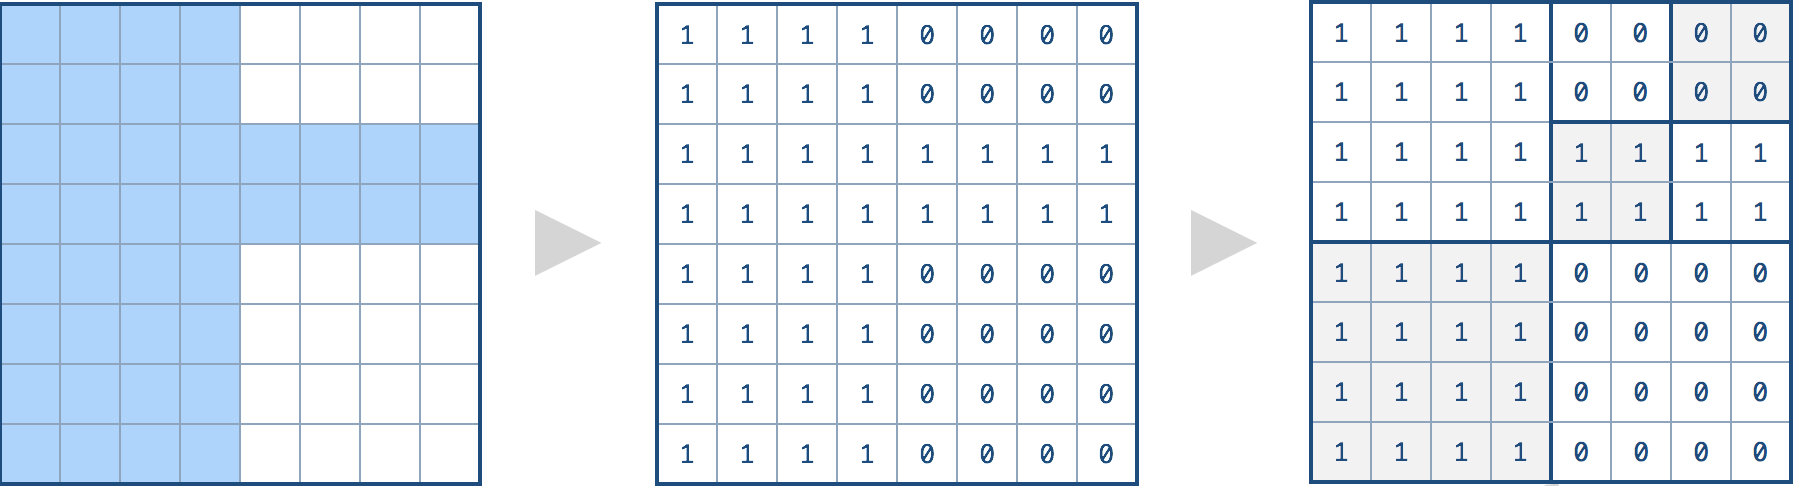

In [ ]:
# Definition for a QuadTree node.
class Node(object):
    def __init__(self, val, isLeaf, topLeft, topRight, bottomLeft, bottomRight):
        self.val = val
        self.isLeaf = isLeaf
        self.topLeft = topLeft
        self.topRight = topRight
        self.bottomLeft = bottomLeft
        self.bottomRight = bottomRight

import numpy as np
class Solution(object):
    def construct(self, grid):
        """
        :type grid: List[List[int]]
        :rtype: Node
        """
        root=Node('*' , None , None ,None ,None ,None )
        if len(grid) == 1:   # 当方格内只有一个节点，则肯定是叶子节点
            root.isLeaf = True
            root.val = True if grid[0][0] == 1 else False
            
        if self.all_val_same(grid):      # 方格内所有值都相等
            root.isLeaf = True
            root.val = grid[0][0]
        
        else:     # 并非所有值都相等，还可以继续再分
            half_length=len(grid) // 2
            root.isLeaf = False
            
            # 使用array完成数组切片
            root.topLeft = self.construct(np.array(grid)[:half_length,:half_length].tolist())
            root.topRight = self.construct(np.array(grid)[:half_length,half_length:].tolist())
            root.bottomLeft = self.construct(np.array(grid)[half_length: , :half_length].tolist())
            root.bottomRight = self.construct(np.array(grid)[half_length: , half_length:].tolist())
        return root
        
        
    def all_val_same(self , grid): # 判断网格中的所有值是否相等
        for i in range(len(grid)):
            for j in range(len(grid[0])):
                if grid[0][0] != grid[i][j]:
                    return False
        return True

# 429、N叉树的层次遍历

In [ ]:

# Definition for a Node.
class Node(object):
    def __init__(self, val, children):
        self.val = val
        self.children = children 

class Solution(object):
    def levelOrder(self, root):
        """
        :type root: Node
        :rtype: List[List[int]]
        """
         if not root:  # 当root节点为空时
            return []
        quenen=[root]
        res=[]
        while quenen:  # 当前层队列
            tem=[]
            next_quenen=[]  # 下一队列
            while quenen:
                node=quenen.pop(0)
                tem.append(node.val)
                next_quenen.extend(node.children)  # 子节点加入下一层
            res.append(tem)
            quenen=next_quenen
        return  res